<a href="https://colab.research.google.com/github/babymlin/Imbalanced/blob/main/Weighted_cross_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras.backend as K

## Binary Crossentropy

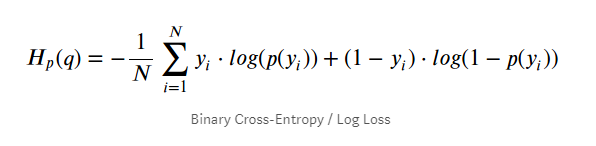

In [ ]:
# make data
size = 2
prediction = np.random.uniform(low=0, high=1, size=(size))
target = np.random.randint(low=0, high=2, size=(size)).astype(float)

prediction, target
print('pred: \n', prediction)
print('target: \n', target)

pred: 
 [0.82814015 0.73369707]
target: 
 [1. 1.]


In [ ]:
# Binary Crossentropy from Keras
binary_loss = keras.losses.binary_crossentropy(target, prediction)
binary_loss

<tf.Tensor: shape=(), dtype=float64, numpy=0.24911583084014705>

In [ ]:
# Binary Crossentropy from Scratch
def binary_crossentropy(y_target, y_pred):
    loss = y_target * tf.math.log(y_pred + K.epsilon())
    loss += (1-y_target) * tf.math.log(1 - y_pred + K.epsilon())
    return tf.math.reduce_mean(-loss) 

binary_crossentropy(target, prediction)

<tf.Tensor: shape=(), dtype=float64, numpy=0.24911583084014705>

In [ ]:
# Weighted Binary Crossentropy
def binary_crossentropy_weight(y_target, y_pred):
    positive_weight = 2
    negative_weight = 1
    loss = y_target * tf.math.log(y_pred + K.epsilon()) * positive_weight
    loss += (1-y_target) * tf.math.log(1 - y_pred + K.epsilon()) * negative_weight
    return tf.math.reduce_mean(-loss) 

binary_crossentropy_weight(target, prediction)

<tf.Tensor: shape=(), dtype=float64, numpy=0.4982316616802941>

In [ ]:
# create model
model = keras.models.Sequential([
    keras.layers.Input((32,32,3)),
    keras.layers.Conv2D(16, 3),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# use customized loss function
model.compile(optimizer='adam', loss=binary_crossentropy_weight)

## Categorical Crossentropy

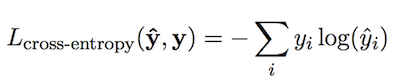

In [ ]:
# make data
size = 2
prediction = np.random.uniform(low=0, high=1, size=(size, 3))
prediction = prediction / np.sum(prediction, axis=-1, keepdims=True)
target = np.random.randint(0, high=3, size=(size))
target = keras.utils.to_categorical(target, num_classes=3).astype(float)

print('pred: \n', prediction)
print('target: \n', target)

pred: 
 [[0.2466045  0.24426356 0.50913194]
 [0.03574897 0.24540997 0.71884106]]
target: 
 [[0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
# Categorical Crossentropy from Keras
categorical_loss = keras.losses.categorical_crossentropy(target, prediction)
categorical_loss

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.40950747, 3.33123379])>

In [ ]:
# Categorical Crossentropy from Scratch
def categorical_crossentropy(y_target, y_pred):
    y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())
    loss = y_target * tf.math.log(y_pred)
    loss = tf.reduce_sum(loss, axis=-1)
    return -loss

categorical_crossentropy(target, prediction)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.40950747, 3.33123379])>

In [ ]:
# Weighted Categorical Crossentropy for 3 classes
def categorical_crossentropy_weight(y_target, y_pred):
    class_weight = [5., 0.5, 0.5]
    y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())
    loss = y_target * tf.math.log(y_pred) * class_weight
    loss = tf.reduce_sum(loss, axis=-1)
    return -loss

categorical_crossentropy_weight(target, prediction)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 0.70475373, 16.65616896])>

In [ ]:
# create model
model = keras.models.Sequential([
    keras.layers.Input((32,32,3)),
    keras.layers.Conv2D(16, 3),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# use customized loss function
model.compile(optimizer='adam', loss=categorical_crossentropy_weight)